GROUP 8

# Introduction

Yelp is an extremely widely-used app in the United States. Reviews on Yelp can influence one's choice in literally every suspect in everyday life, which makes yelp reviews significantly related to business' profit. To help enterprises to improve their performance on Yelp, we decided to analyze the reviews and business attributes of business to help them improve their service and find out their strengths and weakness.

# Data summary

We focused on restaurants in Wisconsin. There are 93488 reviews and 1703 businesses in total. We only used review.json and bussiness.json. For review, we used stars, text, business name to do further analysis. For business, we used stars, attributes, business names to do further investigation. Detailed procedures are in the review and business section.

# Review

# Business

There are total 1703 restaurant in Wisconsin. To find out the strength and weakness of each business, we used attributes which means the service provided in each business. There are some typical categories like "WIFI", "Business Parking" which seem reasonable to affect the average review of one business.

## Data preprocessing

There are sevral steps to process the attribute. Since attribute is a multi-layer dictionary, so we have to extract its key and values for further investigation.
### STEP 1. Convert multi-layer dictionary to a flat list
The first step is to convert multi-layer dictionary to a flat list. We first transformed all the keys and values to lower case. For multiple layer items, we use key from outter layer and key1 from inner layer as the new key i.e. "key_key1" such as "bussinessparking_garage". Then we try to combine the key and values together, to unify the attribute, we convert all values like "yes", "true" to be "yes". All values like "no","none" to be "none". For the keys with their own unique values, we just use the value to combine with the key like "wifi_free" and "wifi_paid".

In summary, there are three steps.
1. Key & value to lower case
2. Multiple layer: use key_key1 as new item => businessparking_garage
3. "yes" or "true" values => "yes"."no" or "none" => "none". 
 
### STEP 2. Deal with missing data.
Since the attribute of every bussiness is not same and havs different categories compared to others. So adding NA value is necessary. However, add a NA value for each existing attribute is too distractive and with too many varaibles, it will decrease the statistical power of our final model. So we decided to add NA for each categories. Like "wifi", there are wifi_yes, wifi_none, wifi_free and wifi_paid. Adding NA to each of them seems dumb, so for those bussiness who does not have any one of these four, we will add a wifi_NA for them. At last, we can convert these five words to be "free", "paid", "none", "yes" and NA under "wifi" category.

After data processing, we got a list with business stars and 74 attibutes. Detailed attributes can be found in 

## Regression tree

Since the missing rate is extremely high in the missing data, we decided to use GUIDE, a statistical software to deal with missing data and fit tree model for it. GUIDE is developed and maintained by Weiyin, Loh in statistical aprtment in UW-madison. Since dependent variable: stars is a continuous variable, we fitter regression tree using the processed data.

### Regression tree result

Number of terminal nodes of final tree is 7 and total number of nodes of final tree is 13. Best split variable is businessparking_street and second best split variable (based on curvature test) at root node is goodformeal_dinner. The tree diagrame is shown as following.

![](bus.png)

blabla result balaba

#### Importance score

In [5]:
library(data.table)
score0 = fread("var.out",header=T)

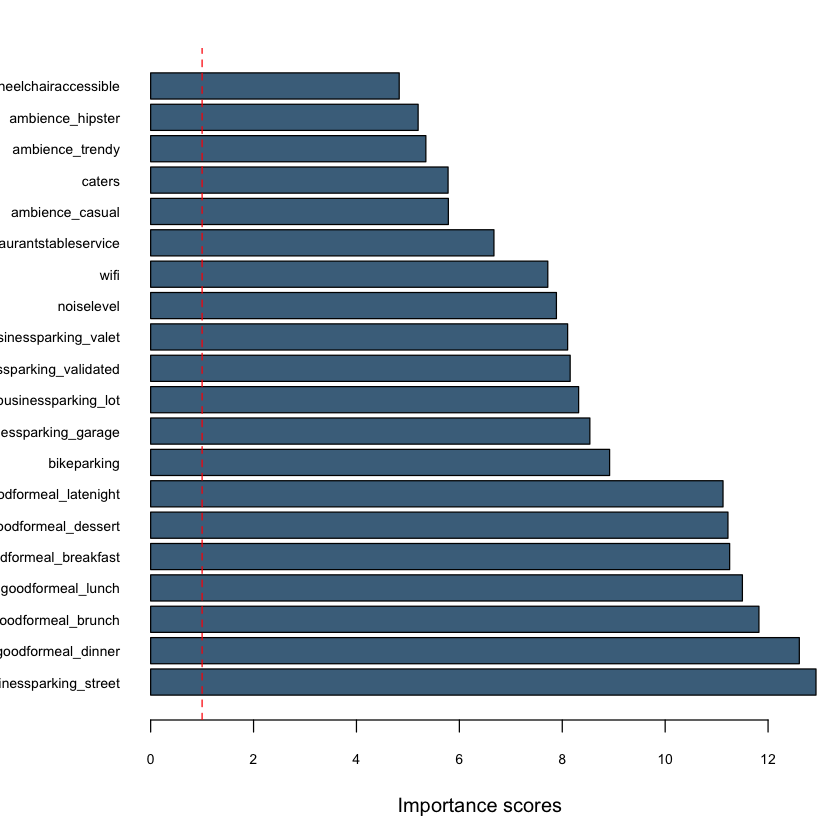

In [7]:
score0=score0[1:20,]
par(mar=c(5,6,2,1),las=1,cex.axis=0.7)
barplot(score0$Score,names.arg=score0$Variable,col="skyblue4",
        horiz=TRUE,xlab="Importance scores")
abline(v=1,col="red",lty=2)

result balbal

#### Linear Regression
We select variable with important score larger than 1 (according to the GUIDE manuscript: importance score larger than 1 is considered as important variables). We used those variables to fit linear regression and delete all the variables with NA in their coefficients since in this way, there are mult-colinearlity in those varaibles. And we fit the model again. At last, we got 19 significant varaibles.

In [8]:
table0 = fread("bus_att_coef.csv",header=T)
table0

V1,Estimate,Std..Error,t.value,Pr...t..
(Intercept),2.9972593,0.16412579,18.261964,5.355398e-68
drivethru: yes,-0.6382427,0.14536568,-4.390601,1.202254e-05
noiselevel: very_loud,-0.6002776,0.13499137,-4.446785,9.299125e-06
wifi: paid,-0.5073153,0.23148234,-2.191594,2.854836e-02
businessparking_street: yes,0.4329297,0.07373527,5.871406,5.215079e-09
restaurantsattire: new_level,0.4182954,0.07662750,5.458815,5.524229e-08
businessacceptscreditcards: yes,-0.2611041,0.10398102,-2.511075,1.213145e-02
businessparking_street: none,0.2374682,0.06366725,3.729833,1.980955e-04
goodformeal_dinner: yes,0.2194556,0.05839297,3.758254,1.770675e-04
restaurantstableservice: none,0.1926625,0.06742976,2.857232,4.327174e-03


We gave advide based on the level of significant variables and decide whether the variable is strength or weakness of the business by the estimate is postive or negative.